In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import networkx as nx

In [3]:
df = pd.read_csv("78.csv")

In [34]:
x  = []
y  = []
for line in df['coordinate']:
    xc,yc = line.split(",")
    x.append(int(xc))
    y.append(int(yc))
    
df.insert(4, "xcoord", x, True)
df.insert(5, "ycoord", y, True)

In [5]:
len(df['user_id'].unique())

1004894

In [36]:
df.user_id = pd.Categorical(df.user_id)
df['user_id'] = df.user_id.cat.codes
number_user = len(df['user_id'].unique())

In [ ]:
plt.bar(df['pixel_color'].unique(),df['pixel_color'].value_counts(),align='center')
plt.xticks(rotation=90)

In [38]:
number_user = len(df['user_id'].unique())
number_user

1071355

# Analisi iniziale

(array([5.07317058e-01, 2.01024767e-01, 1.31892168e-01, 1.10063113e-01,
        8.51424390e-02, 5.44139586e-02, 1.97123165e-02, 1.53595732e-03,
        8.29686601e-06, 1.03710825e-06]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

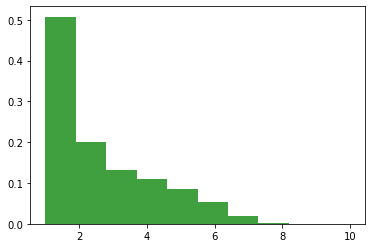

In [39]:
plt.hist(df['user_id'].value_counts(),density=True, facecolor='g', alpha=0.75)

In [40]:
len(df['coordinate'].unique())

554432

In [41]:
df2 = df[['user_id','xcoord','ycoord']]
df2 = df2.sort_values('user_id')

In [42]:
len(df['coordinate'].value_counts())

554432

In [43]:
min(df['coordinate'])

'0,0'

# creazione matrice adiacenza

In [44]:
df2.set_index("user_id")
df2

,user_id,xcoord,ycoord
1910351,0,348,394
1050775,0,1020,188
1476973,0,744,198
2292777,0,767,229
2376217,1,1016,1914
...,...,...,...
1800120,1071352,764,173
1041843,1071352,944,192
2309956,1071352,744,177
68200,1071353,983,571


In [45]:
pixel = {}
for row in df2.itertuples():
    user = row.Index
    x = row.xcoord
    y = row.ycoord
    if (x,y) in pixel:
        pixel[(x,y)].append(user)
    else: 
        pixel[(x,y)] = [user]

In [46]:
f = open("data.txt", "w")
cnt = 0
for pix in pixel:
    #print('questo é il primo pixel: ',pix)
    #print('questo sono gli utenti che hanno modificato il pixel',pixel[pix])
    
    for (user1,user2) in list(itertools.combinations(pixel[pix], 2)):
        f.write(str(user1) + ',' + str(user2) + '\n')
        cnt += 1
        
        
f.close()    
print(cnt)

32835065


32M di link

# importa il file

In [47]:
filepath='./matrix.txt'

In [48]:
fh=open(filepath,'r')

In [49]:
s=fh.readlines()

In [4]:
s[10].strip().split()

['272046,92142']

In [50]:
G=nx.Graph()

In [ ]:
fh=open(filepath,'r')

#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split(",")
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        
        G.add_edge(origin,dest)
    
#chiudo il file
fh.close()

In [9]:
print("The network has", len(G), "nodes")

The network has 864920 nodes


In [10]:
print("The network has", len(G.edges()), "edges")

The network has 5156554 edges


In [18]:
deg=dict(G.degree()).values()

In [19]:
from collections import Counter 

deg_distri=Counter(deg)
print(deg_distri)

Counter({1: 240384, 2: 146412, 3: 95812, 4: 64835, 5: 46158, 6: 34587, 7: 25400, 8: 20322, 9: 15620, 10: 13002, 11: 12156, 12: 9906, 13: 8414, 14: 7185, 15: 6032, 16: 5746, 17: 5580, 18: 4864, 19: 4020, 20: 3990, 21: 3894, 22: 3358, 23: 3120, 24: 2875, 27: 2828, 26: 2538, 25: 2522, 29: 2190, 30: 1891, 28: 1827, 32: 1749, 31: 1696, 33: 1666, 35: 1620, 36: 1480, 34: 1435, 43: 1364, 50: 1224, 42: 1204, 41: 1134, 57: 1102, 40: 1066, 51: 1040, 38: 1014, 62: 1008, 44: 990, 37: 988, 46: 987, 58: 944, 55: 896, 39: 880, 53: 810, 72: 803, 64: 780, 59: 780, 47: 768, 49: 750, 45: 736, 54: 715, 52: 689, 48: 686, 78: 632, 61: 620, 65: 594, 94: 570, 56: 570, 79: 560, 91: 552, 77: 546, 74: 525, 73: 518, 126: 508, 82: 498, 70: 497, 81: 492, 69: 490, 473: 474, 66: 469, 109: 440, 438: 439, 107: 432, 85: 430, 60: 427, 105: 424, 205: 412, 100: 404, 394: 395, 97: 392, 96: 388, 63: 384, 379: 380, 376: 377, 90: 364, 179: 360, 115: 348, 171: 344, 342: 343, 67: 340, 335: 336, 167: 336, 103: 312, 102: 309, 304: 

(1.0, 10000.0, 1e-05, 1.0)

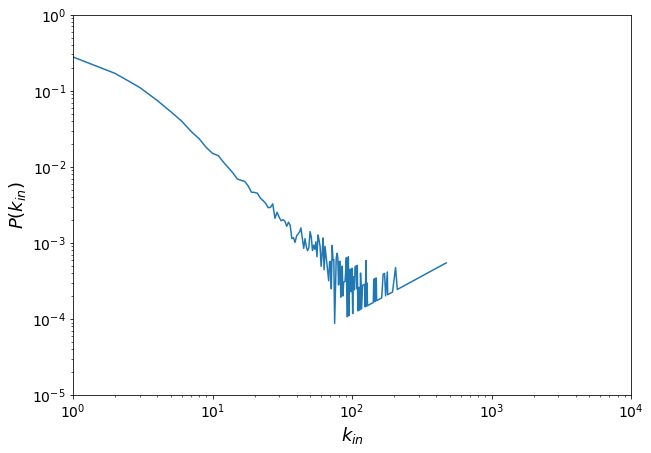

In [20]:
x=[]
y=[]

for i in sorted(deg_distri):   
    x.append(i)
    y.append(deg_distri[i]/len(G))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
plt.figure(figsize=(10,10))
#nx.draw_networkx(G)
plt.axis('off')

In [22]:
print("Is the graph simply connected?", nx.is_connected(G))

Is the graph simply connected? False


In [23]:
print("The graph has", nx.number_connected_components(G), "connected components")

The graph has 233377 connected components


In [28]:
graphs = list(nx.connected_components(G))

In [32]:
for k in nx.connected_components(G):
    print(len(k))
    break

2


In [29]:
H = G.subgraph(graphs[0])

In [30]:
print("Is the graph simply connected?", nx.is_connected(H))

Is the graph simply connected? True


In [31]:
print("The network has", len(H), "nodes")

The network has 2 nodes
